In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

In [99]:
class Graph(object):
    def __init__(self, edge_list=None, coords=None):
        """ initializes a graph object from either an edge list (priority) 
            or an array of points 2d points (will connect everything together)
        """
        if edge_list:
            self.edge_list = edge_list
        elif coords:
            self.edge_list = self.gen_edge_list(coords)
        else:
            self.edge_list = []

    def edges(self):
        """ returns the edges of a graph """
        return self.edge_list
    
    def add_edge(self, edge):
        """ appends an edge to edge list"""
        self.edge_list.append(edge)
        
    def gen_edge_list(self, coords):
        """generates an edge list from unlabeled coordinates"""
        def distance(p1,p2):
            return sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)
        
        edge_list = []
        for i, p1 in enumerate(coords):
            for j, p2 in enumerate(coords):
                if i<j:
                    edge_list.append([i,j,distance(p1,p2)])
        return edge_list
                    
    def get_adj_list(self):
        """return adj list representation of self"""
        adj_list = [[] for i in range(self.size())]
        
        for a,b,c in self.edge_list:
            adj_list[a].append([b,c])
        
        return adj_list
    
    def get_max_length(self):
        adj_list = self.get_adj_list()
        visited = [False for i in range(self.size())]
        def dfs(a):
            if visited[a]:
                return 0
            visited[a] = True
            total = 1
            for b,w in adj_list[a]:
                total += dfs(b)
            return total
        lengths = [dfs(a) for a in range(self.size())]
        if lengths:
            return max(lengths)
        else:
            return 0

    def mst(self):
        """ returns an MST of self"""
        self.edge_list = sorted(self.edge_list, key = lambda x: x[2])
        
        new_edge_list = []
        
        link = [i for i in range(self.size())]
        size = [1 for i in range(self.size())]
        
        def find(x):
            while x!=link[x]:
                x = link[x]
            return x
        
        def same(a,b):
            return find(a)==find(b)
        
        def unite(a,b,c):
            new_edge_list.append([a,b,c])
            a = find(a)
            b = find(b)
            if (size[a]<size[b]):
                temp = a
                a = b
                b = temp
            size[a] += size[b]
            link[b] = a
            
        for a,b,c in self.edge_list:
            if not same(a,b):
                unite(a,b,c)
        
        return Graph(new_edge_list)
    
    def prune_long_edges(self, z_score):
        """returns a graph with edges with edges more than z_score std deviations away from mean"""
        lengths = np.array([c for a,b,c in self.edge_list])
        std = np.std(lengths)
        mean = np.mean(lengths)
        
        new_edge_list = [[a,b,c] for a,b,c in self.edge_list if (c-mean)/std < z_score]
        
        return Graph(new_edge_list)
    
    def faces_to_connections(faces):
        """faces - array of [[x0,y0,w0,h0],[x1,y1,w1,h1],...]
           connections - array [[x0,y0,x1,y1],...] where x0,y0 to x1,y1 connects the centers of faces 
           from faces array with mst. ROUNDING to int
        """
        
        g = []
        for (x, y, w, h) in faces:
            g.append([x+w/2,y+h/2])
        graph = Graph(coords=g)
        
        c = []
        for a, connections in enumerate(graph.mst().get_adj_list()):
            for b,w in connections:
                c.append([int(faces[a][0]+faces[a][2]/2),int(faces[a][1]+faces[a][3]/2),int(faces[b][0]+faces[b][2]/2),int(faces[b][1]+faces[b][3]/2)])
        return c
        
    def size(self):
        """returns number of nodes"""
        s = 0
        for a,b,w in self.edge_list:
            s = max(max(a+1,b+1),s)
        return s
    
    def __str__(self):
        res = "edges:"
        for a,b,c in self.edge_list:
            res += '\n'+str(a)+'=>'+str(b)+'   weight = ' + str(round(c,2))
        return res

In [85]:
g = [[0,1,3],
     [1,2,2],
     [2,3,3],
     [0,2,2],
     [3,1,1],
     [3,0,2]
    ]
graph = Graph(edge_list=g)

In [86]:
print(graph)

edges:
0=>1   weight = 3
1=>2   weight = 2
2=>3   weight = 3
0=>2   weight = 2
3=>1   weight = 1
3=>0   weight = 2


In [87]:
print(graph.mst())

edges:
3=>1   weight = 1
1=>2   weight = 2
0=>2   weight = 2


In [88]:
print(graph.mst().prune_long_edges(0.2))

edges:
3=>1   weight = 1


In [89]:
p = [[0,0],
     [-1,-1],
     [0,-3],
     [4,3],
     [10,8],
     [0,5],
     [-4,5]
    ]
graph = Graph(coords=p)

In [90]:
print(graph)

edges:
0=>1   weight = 1.41
0=>2   weight = 3.0
0=>3   weight = 5.0
0=>4   weight = 12.81
0=>5   weight = 5.0
0=>6   weight = 6.4
1=>2   weight = 2.24
1=>3   weight = 6.4
1=>4   weight = 14.21
1=>5   weight = 6.08
1=>6   weight = 6.71
2=>3   weight = 7.21
2=>4   weight = 14.87
2=>5   weight = 8.0
2=>6   weight = 8.94
3=>4   weight = 7.81
3=>5   weight = 4.47
3=>6   weight = 8.25
4=>5   weight = 10.44
4=>6   weight = 14.32
5=>6   weight = 4.0


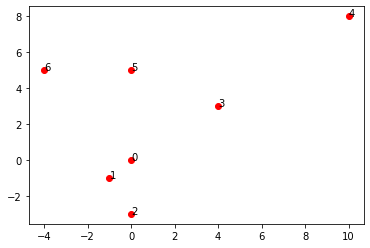

In [91]:
plt.plot([a[0] for a in p], [a[1] for a in p], 'ro')

for i, xy in enumerate(p):
    plt.annotate(str(i), xy)
plt.show()

In [92]:
print(graph.mst())

edges:
0=>1   weight = 1.41
1=>2   weight = 2.24
5=>6   weight = 4.0
3=>5   weight = 4.47
0=>3   weight = 5.0
3=>4   weight = 7.81


In [93]:
print(graph.mst().prune_long_edges(0.1).get_adj_list())

[[[1, 1.4142135623730951]], [[2, 2.23606797749979]], [], [], [], [[6, 4.0]], []]


In [94]:
print(graph.mst().prune_long_edges(0.1).get_max_length())

3


In [95]:
import cv2

In [67]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [100]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('/anaconda3/pkgs/libopencv-3.4.2-h7c891bd_1/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml')

# To capture video from webcam. 
cap = cv2.VideoCapture(0)
# To use a video file as input 
# cap = cv2.VideoCapture('filename.mp4')

while True:
    # Read the frame
    _, img = cap.read()
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    # Display
    for x1,y1,x2,y2 in Graph.faces_to_connections(faces):
            cv2.line(img, (x1,y1), (x2,y2),(255, 0, 0), 5)
    cv2.imshow('img', img)
    # Stop if escape key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# Release the VideoCapture object
cap.release()